## Inovative Potential Solution
A standard mark system is proposed to promote water conservation in the hospitality industry. This system serves as a visual indicator of a hotel's commitment to water conservation and empowers guests to make informed decisions. Research has shown that standard marks and certifications can influence user behavior and indirectly influence organizational behavior (Kohler, 2020; Styles & Vassiliadis, 2020).

## Technology
Predictive Analytics: AI-powered predictive analytics models will analyze historical water consumption data to forecast future usage patterns. This predictive capability will enable hotels and Vitens to identify potential issues early on and implement preventive measures to avoid water wastage (Eichholtz, 2021; He et al., 2022).

Recommendation System: AI-based recommendation systems will provide hotels with personalized suggestions for improving water efficiency. These recommendations will be tailored to the specific needs and characteristics of each hotel, considering factors such as industry standards, location, size, and guest profile (He et al., 2022; Kohler, 2020).
## ML Model Implementation 

The proposed solution will employ various ML models to achieve its goals, including: 
//Regression Models: Regression models: will be used to predict future water consumption levels, enabling hotels to take proactive measures to reduce waste.

* At this stage, my main focus will be on predicting the future of water consumption, because regardless of any solution to achieve the goals of 2030, a prediction must be made.

## Data
Since customer data is not available, the raw water consumption data of Los Angeles buildings is used to test the proposed model.
This data is not clean and is frequently updated on this website (https://dev.socrata.com/foundry/data.lacity.org/9yda-i4ya). in this model, the latest site update is used
This data should be cleaned before use and the items used in this model should be extracted from it

# Here's a breakdown of some columns:
BUILDING ADDRESS: The physical address of the building.

BUILDING ID: An identifier for each building.

ENERGY STAR SCORE: A numerical score indicating the energy efficiency of the building.

INDOOR WATER USE (kgal): Indoor water usage in thousands of gallons.

OUTDOOR WATER USE (kgal): Outdoor water usage in thousands of gallons.

POSTAL CODE: The postal code of the building's location.

TOTAL WATER USE (kgal): Total water usage in thousands of gallons.

YEAR BUILT: The year when the building was constructed.

## Read the dataframe 

In [24]:
# importing the seaborn and matplotlib.pyplot libraries along with pandas. 
# These libraries are commonly used for data visualization in Python
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('Existing_Buildings_Energy.csv')
df.head(10) #The head(10) method is used to display the first 10 rows of the DataFrame

,BUILDING ADDRESS,BUILDING ID,CARBON DIOXIDE EMISSIONS (Metric Ton CO2e),COMPLIANCE STATUS,% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI,% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI,ENERGY STAR SCORE,ENERGY STAR CERTIFICATION - ELIGIBILITY,ENERGY STAR CERTIFICATION - LAST APPROVAL DATE,ENERGY STAR CERTIFICATION - YEAR(S) CERTIFIED,...,PROGRAM YEAR,PROPERTY TYPE,SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),Source EUI (kBtu/ft²),TOTAL WATER USE (kgal),WEATHER NORMALIZED SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),WEATHER NORMALIZED SOURCE ENERGY USE INTENSITY (EUI) (kBtu/ft²),YEAR BUILT,AIN,LADBS Building Category
0,14558 KESWICK ST,425463899040,NaN,NOT COMPLIED,NaN,NaN,NaN,NaN,NaN,NaN,...,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,028,"20,000 to 49,999 sqft"
1,5500 S FIGUEROA ST,476102819647,138.1,NOT COMPLIED,29.5,29.5,15,No,Not Available,Not Available,...,2020,Multifamily Housing,54.7,99.9,2859.8,55.3,100.5,2001.0,054,"20,000 to 49,999 sqft"
2,11340 W OLYMPIC BLVD,427804836294,170.6,COMPLIED,-47.8,-47.8,90,Yes,Not Available,Not Available,...,2020,Office,30.3,84.9,1052.3,Not Available,Not Available,1975.0,017,"50,000 to 99,999 sqft"
3,5650 FAIR AVE,448460885789,65.9,COMPLIED,-27,-27,88,No,Not Available,Not Available,...,2021,Multifamily Housing,38.4,59.8,1.6,39.1,60.6,2010.0,011,"20,000 to 49,999 sqft"
4,4715 S ALAMEDA ST,488532822539,64.1,COMPLIED,Not Available,Not Available,Not Available,No,Not Available,Not Available,...,2021,Manufacturing/Industrial Plant,16.3,45.6,244.3,16.3,45.6,2007.0,011,"50,000 to 99,999 sqft"
5,1615 N MARTEL AVE,455587859077,33.5,COMPLIED,-52.8,-52.8,100,No,Not Available,Not Available,...,2020,Multifamily Housing,20,40.3,837.1,20,40.3,1961.0,015,"20,000 to 49,999 sqft"
6,5515 PENFIELD AVE,389675885105,NaN,NOT COMPLIED,NaN,NaN,NaN,NaN,NaN,NaN,...,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,026,"20,000 to 49,999 sqft"
7,1625 STONER AVE,423570837725,24.2,COMPLIED,-70.2,-70.2,100,Yes,Not Available,Not Available,...,2020,Multifamily Housing,13.8,24.1,1303.9,13.9,24.2,1960.0,022,"20,000 to 49,999 sqft"
8,6801 HOLLYWOOD BLVD,458945859879,1344.2,COMPLIED,-41.2,-41.2,Not Available,No,Not Available,Not Available,...,2021,Lifestyle Center,48.1,134.6,24933.6,48.1,134.6,2001.0,045,"20,000 to 49,999 sqft"
9,1762 WESTWOOD BLVD,429165841119,74.3,COMPLIED,-32.2,-32.2,76,Yes,Not Available,Not Available,...,2020,Office,34,95.3,531.1,33.8,94.7,1985.0,040,"20,000 to 49,999 sqft"


In [26]:
# display information about a DataFrame using the info() and describe() methods
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75200 entries, 0 to 75199
Data columns (total 28 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   BUILDING ADDRESS                                                 75200 non-null  object 
 1   BUILDING ID                                                      75200 non-null  int64  
 2   CARBON DIOXIDE EMISSIONS (Metric Ton CO2e)                       40391 non-null  object 
 3   COMPLIANCE STATUS                                                75200 non-null  object 
 4   % DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI                     40391 non-null  object 
 5   % DIFFERENCE FROM NATIONAL MEDIAN SITE EUI                       40391 non-null  object 
 6   ENERGY STAR SCORE                                                40391 non-null  object 
 7   ENERGY STAR CERTIFICATION - ELIGIBILITY 

,BUILDING ID,GROSS BUILDING FLOOR AREA (ft²),NUMBER OF BUILDINGS,OCCUPANCY,POSTAL CODE,PROGRAM YEAR,YEAR BUILT
count,7.520000e+04,4.039100e+04,40391.000000,40391.000000,75200.000000,75200.000000,40391.000000
mean,4.490448e+11,9.294770e+04,1.239385,94.368919,90577.320346,2020.176995,1974.906142
std,8.871551e+10,4.262106e+05,2.283217,15.323461,658.058188,1.948035,24.048837
min,6.170000e+02,0.000000e+00,0.000000,0.000000,90001.000000,2016.000000,1190.000000
25%,4.233899e+11,2.680000e+04,1.000000,95.000000,90024.000000,2019.000000,1963.000000
50%,4.490068e+11,4.254600e+04,1.000000,100.000000,90057.000000,2020.000000,1977.000000
75%,4.753297e+11,8.634450e+04,1.000000,100.000000,91342.000000,2022.000000,1990.000000
max,9.990000e+11,7.093735e+07,134.000000,100.000000,92806.000000,2023.000000,2021.000000


## Exploring missing values in a DataFrame using the isnull()

Using df.isnull().sum() to check for the number of missing values in each column of DataFrame df. This is a useful method to identify how many NaN (Not a Number) or missing values there are in each column. The output will show the count of missing values for each column.

In [27]:
print(df.isnull().sum())

BUILDING ADDRESS                                                       0
BUILDING ID                                                            0
CARBON DIOXIDE EMISSIONS (Metric Ton CO2e)                         34809
COMPLIANCE STATUS                                                      0
% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI                       34809
% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI                         34809
ENERGY STAR SCORE                                                  34809
ENERGY STAR CERTIFICATION - ELIGIBILITY                            34809
ENERGY STAR CERTIFICATION - LAST APPROVAL DATE                     34809
ENERGY STAR CERTIFICATION - YEAR(S) CERTIFIED                      34809
ENTITY RESPONSIBLE FOR BENCHMARK                                   34809
GROSS BUILDING FLOOR AREA (ft²)                                    34809
INDOOR WATER USE (kgal)                                            34809
INDOOR WATER USE INTENSITY (gal/ft²)               

75200 rows and 28 columns are exist, 

"BUILDING ADDRESS," "BUILDING ID," "POSTAL CODE," "PROGRAM YEAR," and "LADBS Building Category" have no missing values.

the count of missing values: # 34809

## Data cleaning

For the first step of data cleaning, lets delete the columns that i think no needed for future medel

In [28]:
# Handle missing values by dropping rows with missing values
df = df.dropna()

# Convert categorical variables into numerical representations (one-hot encoding)
df = pd.get_dummies(df, columns=['COMPLIANCE STATUS', 'ENERGY STAR CERTIFICATION - ELIGIBILITY'])

# Display the modified DataFrame
# print(df)
df

,BUILDING ADDRESS,BUILDING ID,CARBON DIOXIDE EMISSIONS (Metric Ton CO2e),% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI,% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI,ENERGY STAR SCORE,ENERGY STAR CERTIFICATION - LAST APPROVAL DATE,ENERGY STAR CERTIFICATION - YEAR(S) CERTIFIED,ENTITY RESPONSIBLE FOR BENCHMARK,GROSS BUILDING FLOOR AREA (ft²),...,YEAR BUILT,AIN,LADBS Building Category,COMPLIANCE STATUS_COMPLIED,COMPLIANCE STATUS_NOT COMPLIED,ENERGY STAR CERTIFICATION - ELIGIBILITY_No,ENERGY STAR CERTIFICATION - ELIGIBILITY_Non,ENERGY STAR CERTIFICATION - ELIGIBILITY_Not Available,ENERGY STAR CERTIFICATION - ELIGIBILITY_Oui,ENERGY STAR CERTIFICATION - ELIGIBILITY_Yes
1,5500 S FIGUEROA ST,476102819647,138.1,29.5,29.5,15,Not Available,Not Available,"Vert Energy Group, Inc.",44769.0,...,2001.0,054,"20,000 to 49,999 sqft",False,True,True,False,False,False,False
2,11340 W OLYMPIC BLVD,427804836294,170.6,-47.8,-47.8,90,Not Available,Not Available,Transwestern,84850.0,...,1975.0,017,"50,000 to 99,999 sqft",True,False,False,False,False,False,True
3,5650 FAIR AVE,448460885789,65.9,-27,-27,88,Not Available,Not Available,Unknown,31030.0,...,2010.0,011,"20,000 to 49,999 sqft",True,False,True,False,False,False,False
4,4715 S ALAMEDA ST,488532822539,64.1,Not Available,Not Available,Not Available,Not Available,Not Available,"Victory 2020, LLC",65000.0,...,2007.0,011,"50,000 to 99,999 sqft",True,False,True,False,False,False,False
5,1615 N MARTEL AVE,455587859077,33.5,-52.8,-52.8,100,Not Available,Not Available,"Vert Energy Group, Inc.",27777.0,...,1961.0,015,"20,000 to 49,999 sqft",True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75195,14333 ADDISON ST,426919881420,48,-50,-50,100,Not Available,Not Available,NOI Engineering,10000.0,...,2000.0,039,"20,000 to 49,999 sqft",False,True,True,False,False,False,False
75196,12311 CHANDLER BLVD,440375884133,9.8,-90.7,-90.7,100,Not Available,Not Available,Premier Apartments LLC,42864.0,...,1963.0,015,"20,000 to 49,999 sqft",True,False,True,False,False,False,False
75197,5345 SEPULVEDA BLVD,420373883951,232.9,-10.9,-10.9,66,Not Available,Not Available,"Vert Energy Group, Inc.",84547.0,...,1970.0,039,"50,000 to 99,999 sqft",True,False,True,False,False,False,False
75198,1560 S CENTINELA AVE,420867835941,46.2,-25.5,-25.5,86,Not Available,Not Available,V&L Properties Inc,20800.0,...,1969.0,030,"20,000 to 49,999 sqft",True,False,True,False,False,False,False


Now We have 5 more columns. Because pd.get_dummies() creates binary columns for each category in the specified categorical columns.

Each category becomes a new column, and for each row, a 1 is assigned if the original value belongs to that category, and 0 otherwise.

40386 rows and 33 columns

## check Not Available values in some columns

In [35]:
#% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI
count_non_available = df[df['% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI'] != 'Not Available'].shape[0]

print("Number of non-'Not Available' values in '% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI':", count_non_available)
#TOTAL WATER USE (kgal)
count_non_available = df[df['TOTAL WATER USE (kgal)'] != 'Not Available'].shape[0]

print("Number of non-'Not Available' values in 'TOTAL WATER USE (kgal)':", count_non_available)
df = df[df['TOTAL WATER USE (kgal)'] != 'Not Available']

#WEATHER NORMALIZED SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)
count_non_available = df[df['WEATHER NORMALIZED SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)'] != 'Not Available'].shape[0]

print("Number of non-'Not Available' values in 'WEATHER NORMALIZED SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)':", count_non_available)
df = df[df['WEATHER NORMALIZED SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)'] != 'Not Available']

#WEATHER NORMALIZED SOURCE ENERGY USE INTENSITY (EUI) (kBtu/ft²)
count_non_available = df[df['WEATHER NORMALIZED SOURCE ENERGY USE INTENSITY (EUI) (kBtu/ft²)'] != 'Not Available'].shape[0]

print("Number of non-'Not Available' values in 'WEATHER NORMALIZED SOURCE ENERGY USE INTENSITY (EUI) (kBtu/ft²)':", count_non_available)
df = df[df['WEATHER NORMALIZED SOURCE ENERGY USE INTENSITY (EUI) (kBtu/ft²)'] != 'Not Available']

#OUTDOOR WATER USE (kgal)
count_non_available = df[df['OUTDOOR WATER USE (kgal)'] != 'Not Available'].shape[0]

print("Number of non-'Not Available' values in 'OUTDOOR WATER USE (kgal)':", count_non_available)

Number of non-'Not Available' values in '% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI': 70394
Number of non-'Not Available' values in 'TOTAL WATER USE (kgal)': 73116
Number of non-'Not Available' values in 'WEATHER NORMALIZED SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)': 69911
Number of non-'Not Available' values in 'WEATHER NORMALIZED SOURCE ENERGY USE INTENSITY (EUI) (kBtu/ft²)': 69911
Number of non-'Not Available' values in 'OUTDOOR WATER USE (kgal)': 35333


## Clean data by keeping just columns that want to work on them

In [36]:
# Read the existing DataFrame
df = pd.read_csv('existing_buildings_energy.csv')

# Specify the columns that want to keep
columns_to_keep = [
    'YEAR BUILT',
    'TOTAL WATER USE (kgal)',
    'PROPERTY TYPE',
    'POSTAL CODE',
    'OUTDOOR WATER USE (kgal)',
    'NUMBER OF BUILDINGS',
    'INDOOR WATER USE (kgal)',
    'GROSS BUILDING FLOOR AREA (ft²)',
]

# Create a new DataFrame with selected columns
new_df = df[columns_to_keep]

# Display the structure of the new DataFrame
#new_df.info()

# save the new DataFrame to a new CSV file
new_df.to_csv('new_buildings_energy.csv', index=False)
new_df.head()


,YEAR BUILT,TOTAL WATER USE (kgal),PROPERTY TYPE,POSTAL CODE,OUTDOOR WATER USE (kgal),NUMBER OF BUILDINGS,INDOOR WATER USE (kgal),GROSS BUILDING FLOOR AREA (ft²)
0,NaN,NaN,NaN,91405,NaN,NaN,NaN,NaN
1,2001.0,2859.8,Multifamily Housing,90037,Not Available,1.0,Not Available,44769.0
2,1975.0,1052.3,Office,90064,Not Available,1.0,Not Available,84850.0
3,2010.0,1.6,Multifamily Housing,91601,Not Available,1.0,Not Available,31030.0
4,2007.0,244.3,Manufacturing/Industrial Plant,90058,Not Available,1.0,Not Available,65000.0


## Clean data by removing 0 and Not Available data

In [32]:
import warnings

# Ignore deprecated warnings from seaborn
warnings.filterwarnings("ignore", category=FutureWarning)

# Replace '0' and 'Not Available' with NaN and then drop rows with NaN values
new_df.replace(['0', 'Not Available'], pd.NA, inplace=True)
new_df.dropna(inplace=True)

# Display the structure of the cleaned DataFrame
#new_df.info()

# Optionally, save the cleaned DataFrame to a new CSV file
new_df.to_csv('cleaned_buildings_energy.csv', index=False)
new_df.head()

/var/folders/bw/hv48bjw10wjdrwbqkf_f79980000gn/T/ipykernel_1301/3511667037.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace(['0', 'Not Available'], pd.NA, inplace=True)
/var/folders/bw/hv48bjw10wjdrwbqkf_f79980000gn/T/ipykernel_1301/3511667037.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)


,YEAR BUILT,TOTAL WATER USE (kgal),PROPERTY TYPE,POSTAL CODE,OUTDOOR WATER USE (kgal),NUMBER OF BUILDINGS,INDOOR WATER USE (kgal),GROSS BUILDING FLOOR AREA (ft²)
196,1994.0,1341.2,Manufacturing/Industrial Plant,91342,1125.4,1.0,215.8,32114.0
220,1950.0,1821.9,Office,90094,1532.5,1.0,289.4,37463.0
457,2007.0,1800.4,Other,91607,277,1.0,1523.4,28906.0
574,1953.0,1770.3,Worship Facility,90045,1711.1,2.0,59.2,25819.0
776,1953.0,1761.5,Worship Facility,90045,1739.5,2.0,22,25819.0


## Data visualization

## Making plot

Creating a scatterplot matrix using the Seaborn library to visualize the relationships between different pairs of columns in cleaned DataFrame (cleaned_df). This is a useful way to explore potential correlations and patterns in the data.

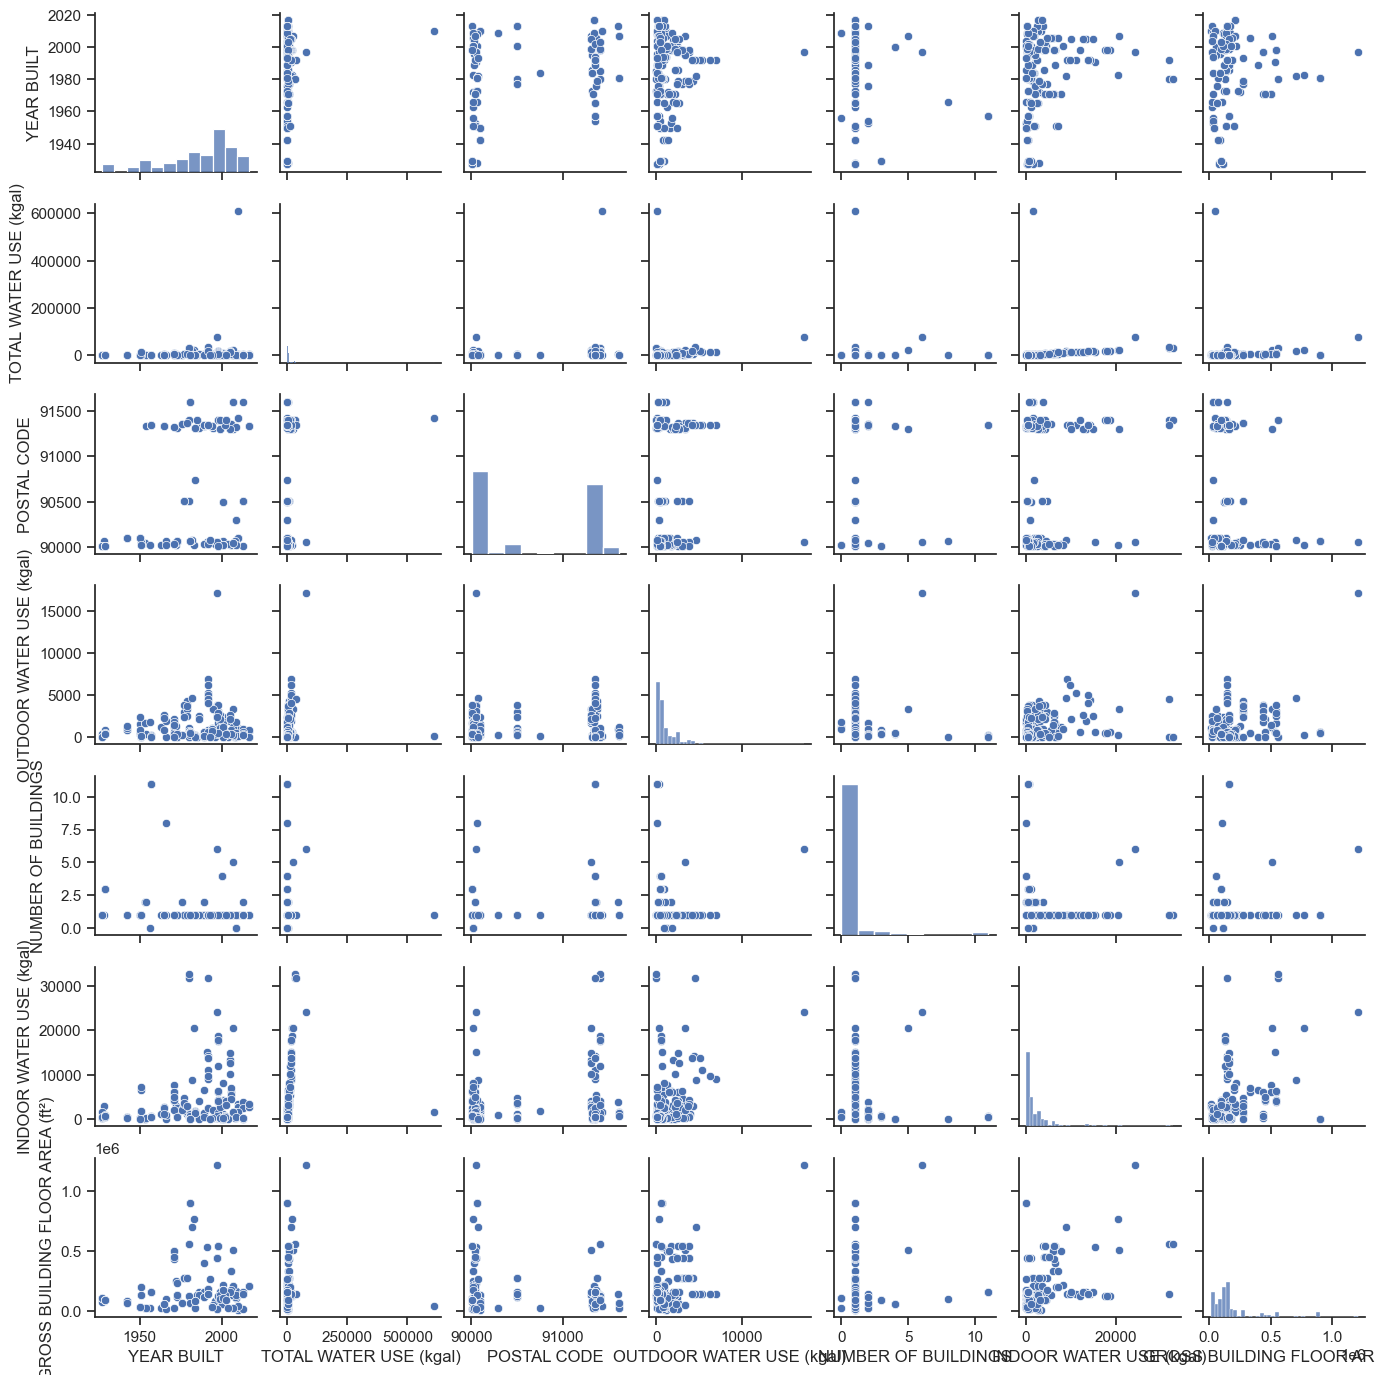

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_df = pd.read_csv('cleaned_buildings_energy.csv')

# Specify the columns for the scatterplot matrix
scatter_columns = [
    'YEAR BUILT',
    'TOTAL WATER USE (kgal)',
    'PROPERTY TYPE',
    'POSTAL CODE',
    'OUTDOOR WATER USE (kgal)',
    'NUMBER OF BUILDINGS',
    'INDOOR WATER USE (kgal)',
    'GROSS BUILDING FLOOR AREA (ft²)',
]

# Create a scatterplot matrix
sns.set(style="ticks")
sns.pairplot(cleaned_df[scatter_columns], height=2, markers="o")
plt.show()


## Changing the name of columns to make plot visible

renamed the columns of DataFrame (cleaned_df) using a mapping (column_mapping) and then created a scatterplot matrix using the renamed columns, to make column names more concise and readable.

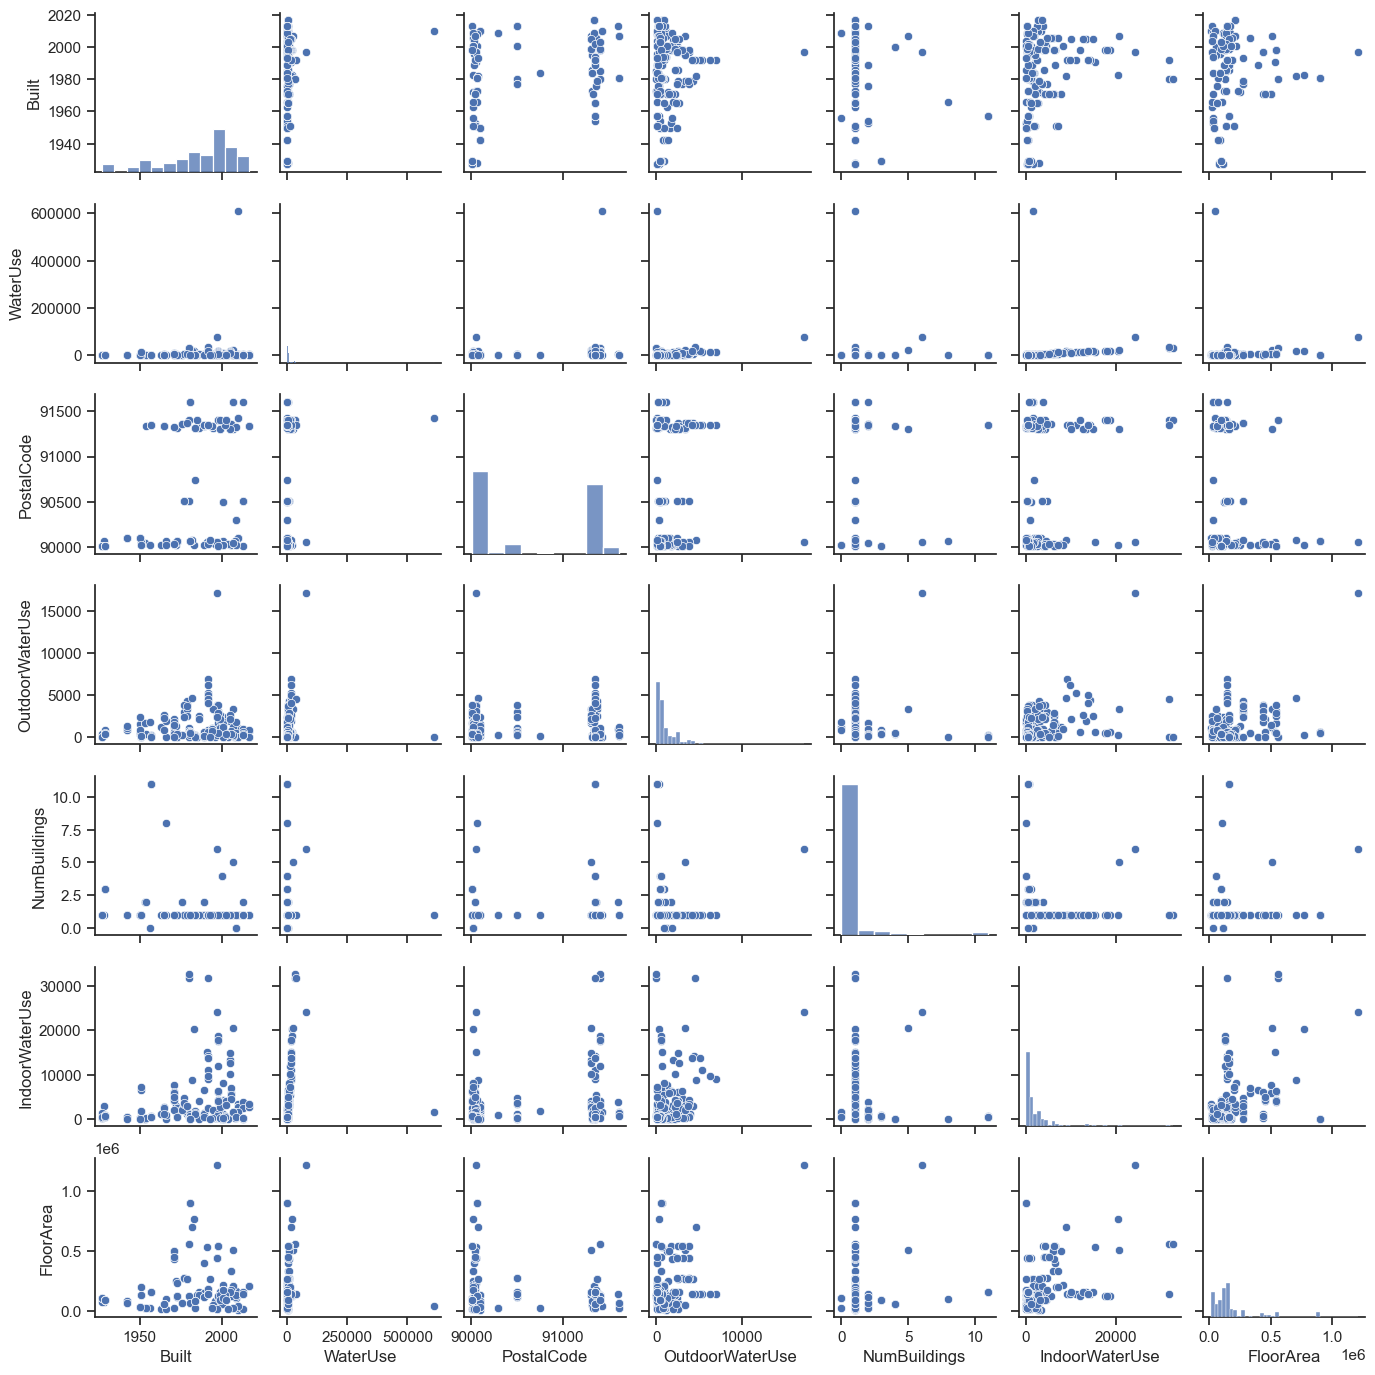

In [21]:
cleaned_df = pd.read_csv('cleaned_buildings_energy.csv')

# Define a mapping of old column names to short names
column_mapping = {
    'YEAR BUILT': 'Built',
    'TOTAL WATER USE (kgal)': 'WaterUse',
    'PROPERTY TYPE': 'PropType',
    'POSTAL CODE': 'PostalCode',
    'OUTDOOR WATER USE (kgal)': 'OutdoorWaterUse',
    'NUMBER OF BUILDINGS': 'NumBuildings',
    'INDOOR WATER USE (kgal)': 'IndoorWaterUse',
    'GROSS BUILDING FLOOR AREA (ft²)': 'FloorArea',
}

# Rename columns using the mapping
cleaned_df.rename(columns=column_mapping, inplace=True)

# Specify the columns for the scatterplot matrix
scatter_columns = list(column_mapping.values())

# Create a scatterplot matrix
sns.set(style="ticks")
sns.pairplot(cleaned_df[scatter_columns], height=2, markers="o")
plt.show()



calculating and visualizing the correlation matrix for numeric columns in DataFrame (cleaned_df). This is a technique to understand the relationships between different numerical variables.

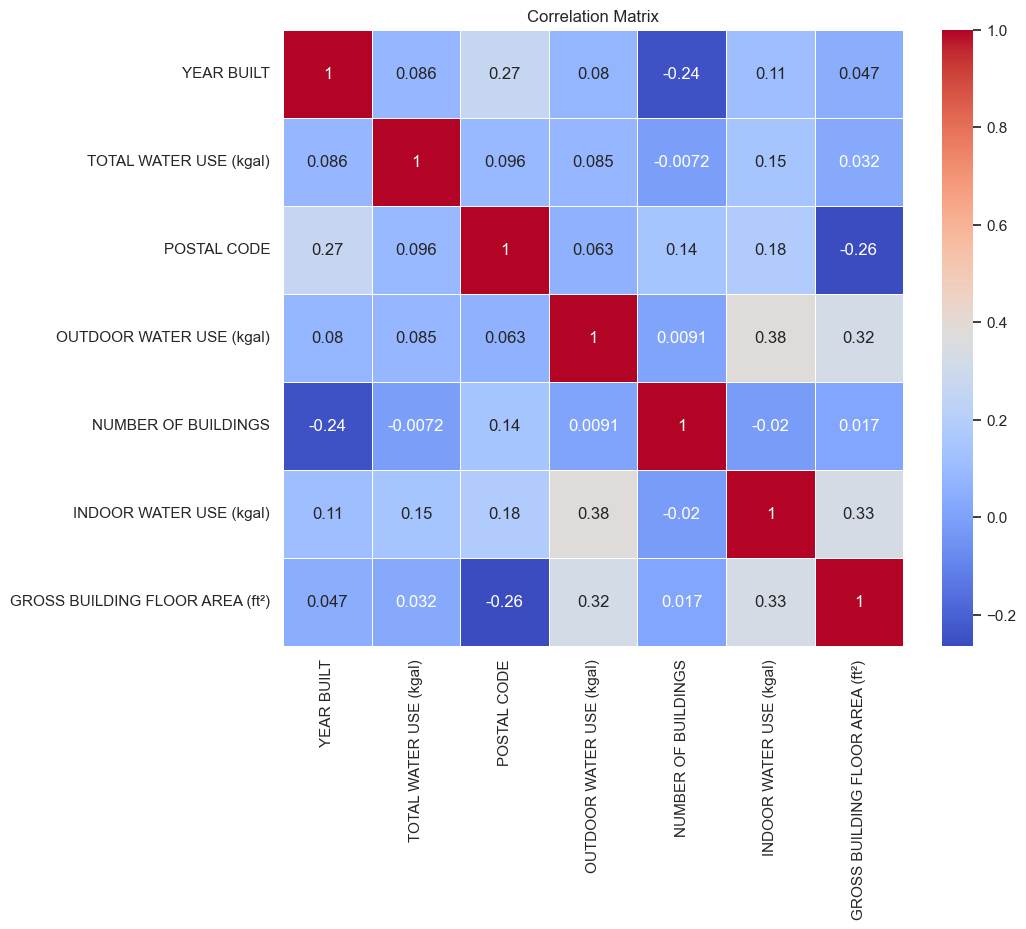

In [2]:
import pandas as pd

cleaned_df = pd.read_csv('cleaned_buildings_energy.csv')

# Specify the columns for the correlation matrix
numeric_columns = cleaned_df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numeric columns only
corr = cleaned_df[numeric_columns].corr()

# Create a heatmap of the correlation matrix
sns.set(style="white")  # Set the style of the visualization
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


## Histograms for Numeric Columns

Visualize the distribution of individual numeric columns using histograms.

This can help to understand the spread and central tendency of each variable.

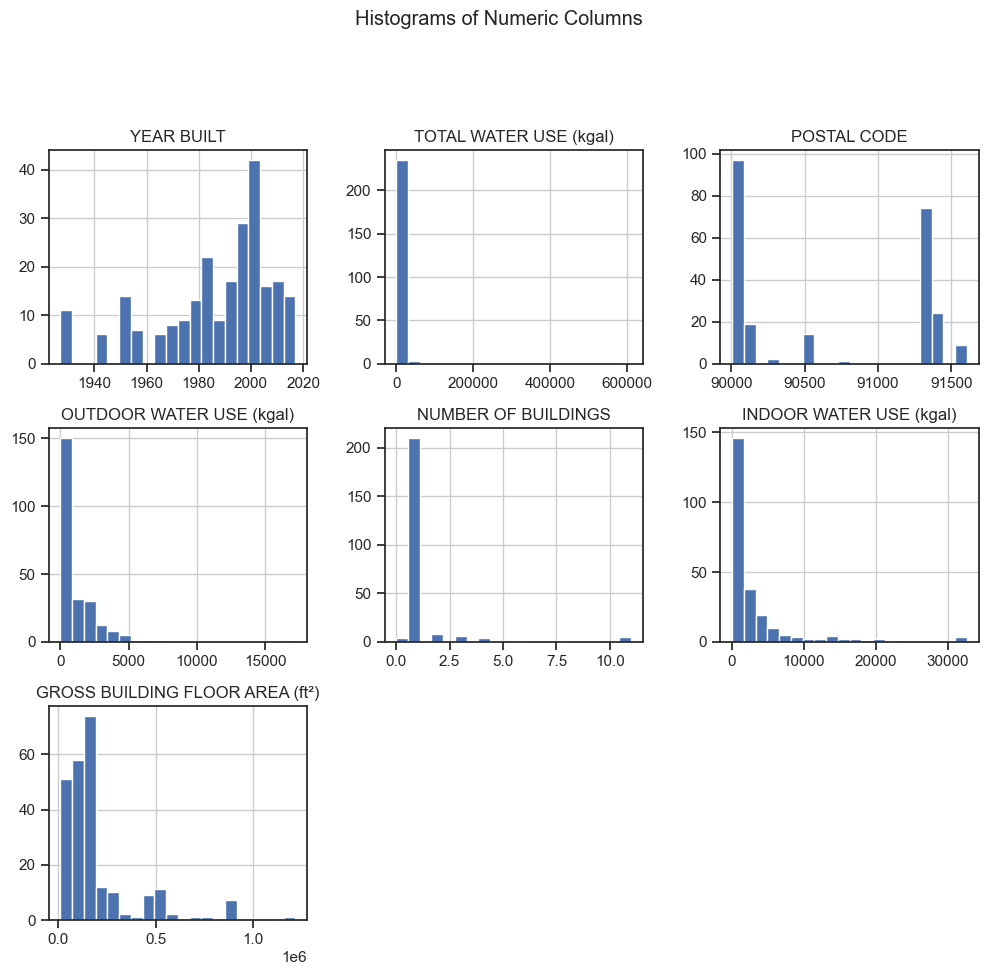

In [37]:
cleaned_df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numeric Columns", y=1.02)
plt.show()


## Box Plots for Numeric Columns

Box plots provide a summary of the distribution of each numeric column, including median, quartiles, and potential outliers.

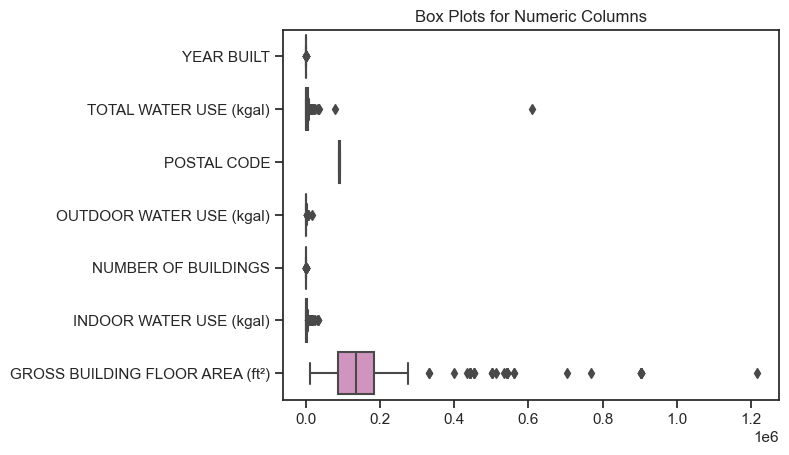

In [38]:
sns.boxplot(data=cleaned_df[numeric_columns], orient="h")
plt.title("Box Plots for Numeric Columns")
plt.show()


## Timeline plot

calculate the number of buildings built each year based on the 'YEAR BUILT' column and 
 then creates a timeline plot using Matplotlib

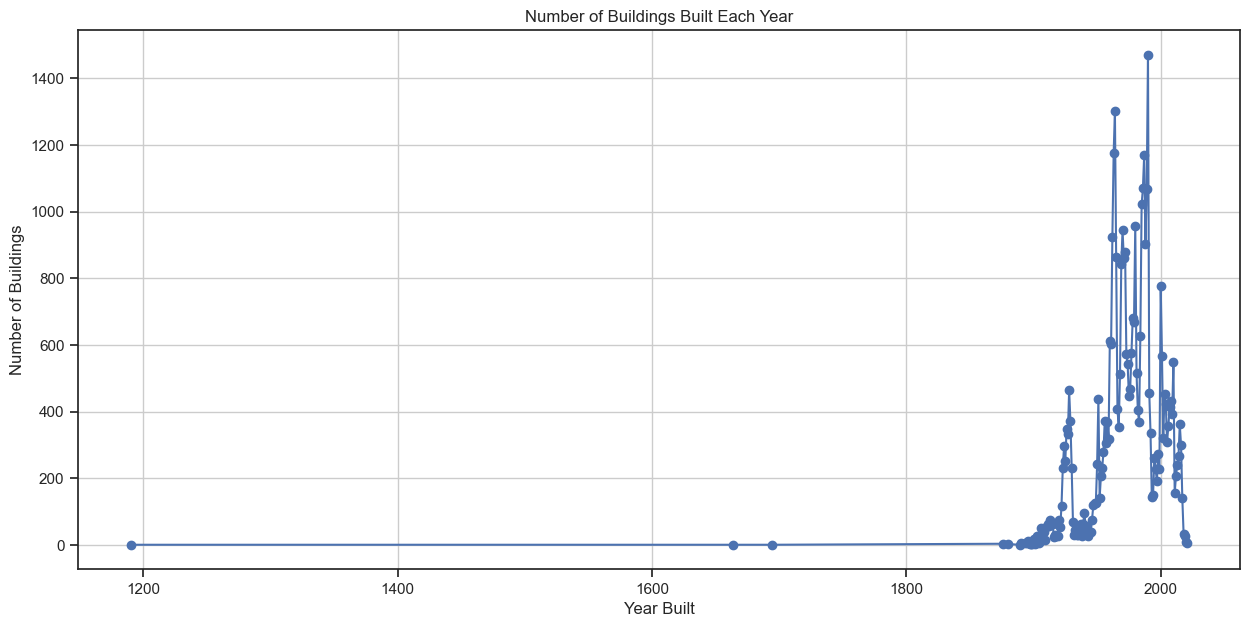

In [45]:
building_counts = df.groupby('YEAR BUILT').size()

# Plot the timeline
plt.figure(figsize=(15, 7))
building_counts.plot(marker='o')
plt.title('Number of Buildings Built Each Year')
plt.xlabel('Year Built')
plt.ylabel('Number of Buildings')
plt.grid(True)
plt.show()


filtering the DataFrame to include only years between 1800 and 2024 before calculating 

and plotting the number of buildings built each year and focus the analysis on a specific time range.

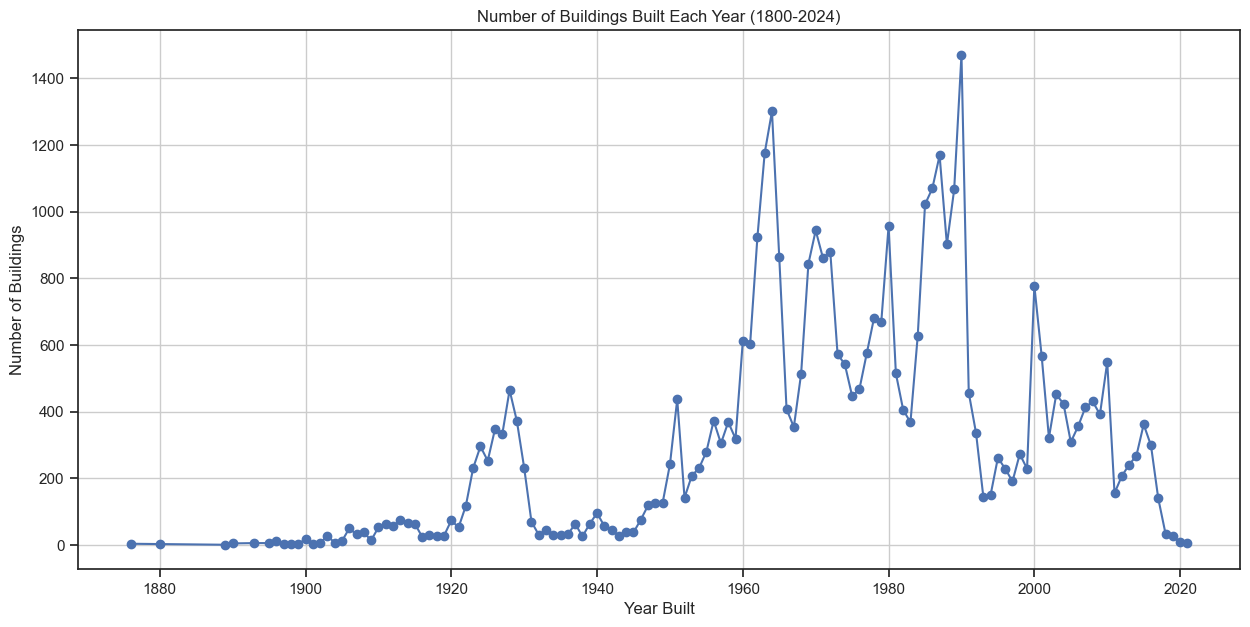

In [46]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only years between 1800 and 2024
filtered_df = df[(df['YEAR BUILT'] >= 1800) & (df['YEAR BUILT'] <= 2024)]

# Calculate the number of buildings built each year
building_counts = filtered_df.groupby('YEAR BUILT').size()

# Plot the timeline
plt.figure(figsize=(15, 7))
building_counts.plot(marker='o')
plt.title('Number of Buildings Built Each Year (1800-2024)')
plt.xlabel('Year Built')
plt.ylabel('Number of Buildings')
plt.grid(True)
plt.show()


## Scatter plot with a regression line

use Seaborn's lmplot to create a scatter plot with a regression line for the relationship between 'GROSS BUILDING FLOOR AREA (ft²)' and 'TOTAL WATER USE (kgal)', to visually inspect the correlation between two variables and observe the trend.

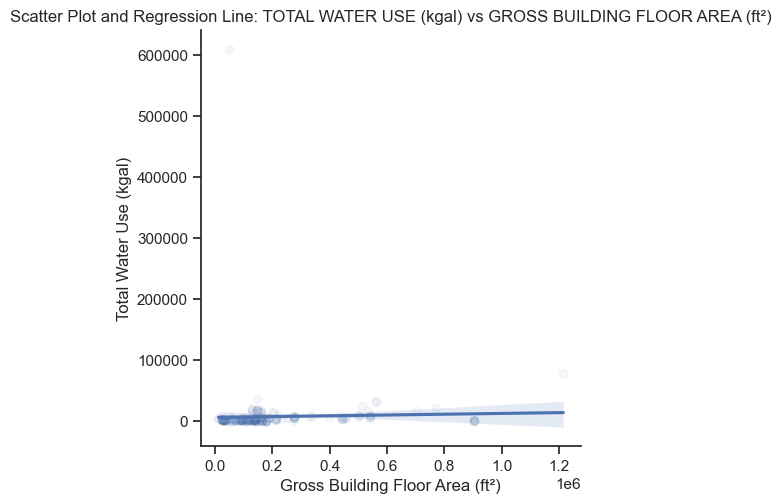

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_df = pd.read_csv('cleaned_buildings_energy.csv')

# Specify the columns for lmplot
x_column = 'GROSS BUILDING FLOOR AREA (ft²)'
y_column = 'TOTAL WATER USE (kgal)'

# Create lmplot
sns.lmplot(x=x_column, y=y_column, fit_reg=True, data=cleaned_df, scatter_kws={'alpha': 0.05})
plt.xlabel('Gross Building Floor Area (ft²)')
plt.ylabel('Total Water Use (kgal)')
plt.title(f'Scatter Plot and Regression Line: {y_column} vs {x_column}')
plt.show()


focus on data points where 'TOTAL WATER USE (kgal)' is between 0 and 100,000, by filtering the data before creating the lmplot. 

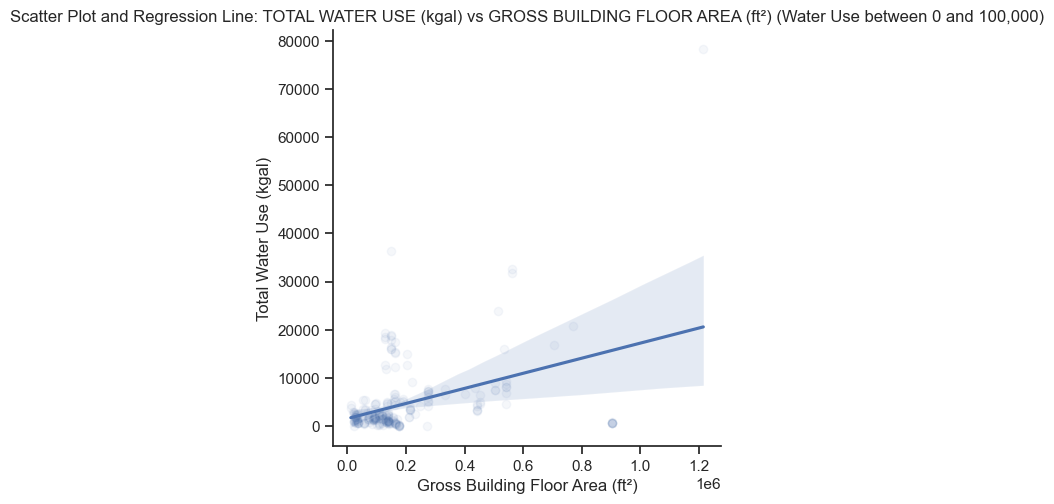

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cleaned_df = pd.read_csv('cleaned_buildings_energy.csv')

# Filter the DataFrame to include only data points where 'TOTAL WATER USE (kgal)' is between 0 and 100,000
filtered_df = cleaned_df[(cleaned_df['TOTAL WATER USE (kgal)'] >= 0) & (cleaned_df['TOTAL WATER USE (kgal)'] <= 100000)]

# Specify the columns for lmplot
x_column = 'GROSS BUILDING FLOOR AREA (ft²)'
y_column = 'TOTAL WATER USE (kgal)'

# Create lmplot
sns.lmplot(x=x_column, y=y_column, fit_reg=True, data=filtered_df, scatter_kws={'alpha': 0.05})
plt.xlabel('Gross Building Floor Area (ft²)')
plt.ylabel('Total Water Use (kgal)')
plt.title(f'Scatter Plot and Regression Line: {y_column} vs {x_column} (Water Use between 0 and 100,000)')
plt.show()


creating two lmplot visualizations for the relationships between 'GROSS BUILDING FLOOR AREA (ft²)' and 'INDOOR WATER USE (kgal)', as well as 'GROSS BUILDING FLOOR AREA (ft²)' and 'OUTDOOR WATER USE (kgal)'. Additionally, filter the DataFrame to exclude data points where either 'Indoor Water Use' or 'Outdoor Water Use' > 10000

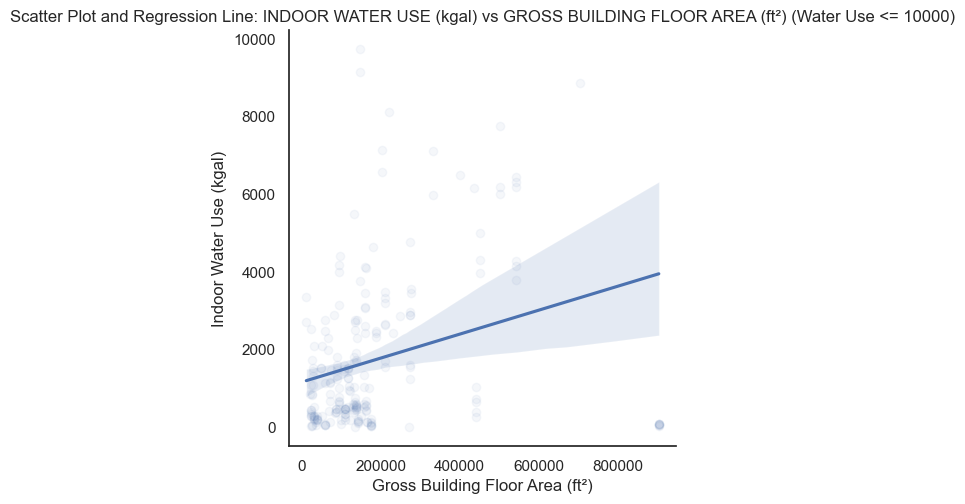

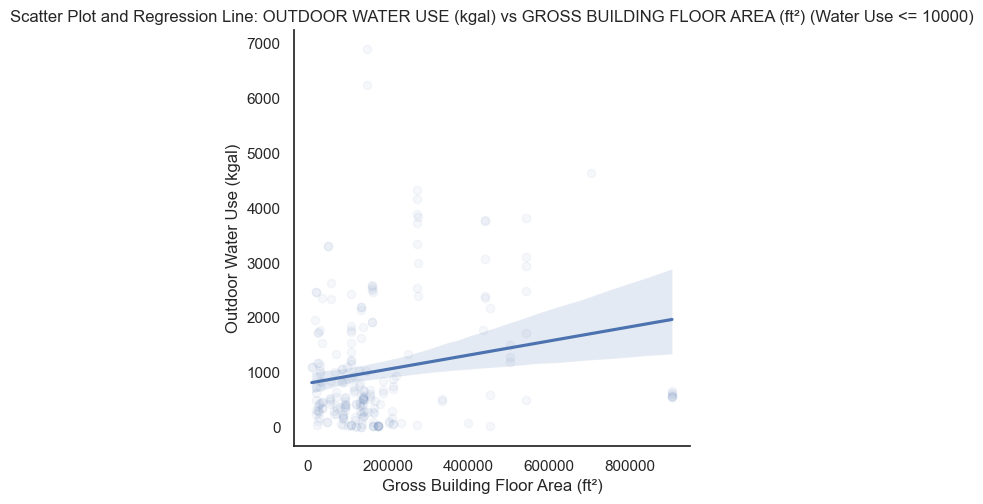

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_df = pd.read_csv('cleaned_buildings_energy.csv')

# Specify the columns for lmplot
x_column = 'GROSS BUILDING FLOOR AREA (ft²)'
indoor_y_column = 'INDOOR WATER USE (kgal)'
outdoor_y_column = 'OUTDOOR WATER USE (kgal)'

# Filter the DataFrame to exclude data points where either 'Indoor Water Use' or 'Outdoor Water Use' > 10000
filtered_df = cleaned_df[(cleaned_df[indoor_y_column] <= 10000) & (cleaned_df[outdoor_y_column] <= 10000)]

# Create lmplot for Indoor Water Use
sns.lmplot(x=x_column, y=indoor_y_column, fit_reg=True, data=filtered_df, scatter_kws={'alpha': 0.05})
plt.xlabel('Gross Building Floor Area (ft²)')
plt.ylabel('Indoor Water Use (kgal)')
plt.title(f'Scatter Plot and Regression Line: {indoor_y_column} vs {x_column} (Water Use <= 10000)')
plt.show()

# Create lmplot for Outdoor Water Use
sns.lmplot(x=x_column, y=outdoor_y_column, fit_reg=True, data=filtered_df, scatter_kws={'alpha': 0.05})
plt.xlabel('Gross Building Floor Area (ft²)')
plt.ylabel('Outdoor Water Use (kgal)')
plt.title(f'Scatter Plot and Regression Line: {outdoor_y_column} vs {x_column} (Water Use <= 10000)')
plt.show()


## use scikit-learn to perform linear regression on data

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1-Loading Data
# load cleaned data from the CSV file into a Pandas DataFrame
cleaned_df = pd.read_csv('cleaned_buildings_energy.csv')

# 2-Selecting Features and Target
# separate features (independent variable) and the target variable (dependent variable) from DataFrame.
features = cleaned_df[['GROSS BUILDING FLOOR AREA (ft²)']]
target = cleaned_df['TOTAL WATER USE (kgal)']

# 3-Splitting Data into Training and Testing Sets
# using the train_test_split function from scikit-learn, to evaluate the model's performance on unseen data.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


# 4-Initialize the Linear Regression model
linear_model = LinearRegression()

# 5-Train (fit) the model using the training data
linear_model.fit(X_train, y_train)

# The model is now trained and ready to make predictions


LinearRegression()

In [74]:
# this code solve the problem that i have with plotting the predictions
# Predictions for Linear Regression model 
linear_predictions = linear_model.predict(X_test)

# Add predictions to the dataframe
cleaned_df['Linear_Reg_Predictions'] = linear_model.predict(features)

## use scikit-learn to perform k-Nearest Neighbors regression on data 
(k-NN model).

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# 1-Loading Data
# load cleaned data from the CSV file into a Pandas DataFrame
cleaned_df = pd.read_csv('cleaned_buildings_energy.csv')

# 2-Selecting Features and Target
# separate features (independent variable) and the target variable (dependent variable) from DataFrame.
features = cleaned_df[['GROSS BUILDING FLOOR AREA (ft²)']]
target = cleaned_df['TOTAL WATER USE (kgal)']

# 3-Split the data into training and testing sets
# split data into training and testing sets using the train_test_split function from scikit-learn.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 4-Initialize the k-NN model (let's use k=3 for this example)
# initialize a k-Nearest Neighbors regressor model using scikit-learn's KNeighborsRegressor class. set n_neighbors to 3, meaning it considers 3 nearest neighbors.
knn_model = KNeighborsRegressor(n_neighbors=3)

# 5-Train (fit) the model using the training data
knn_model.fit(X_train, y_train)

# The k-NN model is now trained and ready to make predictions


KNeighborsRegressor(n_neighbors=3)

In [72]:
# this code solve the problem that i have with plotting the predictions
# Predictions for k-Nearest Neighbors model
knn_predictions = knn_model.predict(X_test)

# Add predictions to the dataframe
cleaned_df['KNN_Reg_Predictions'] = knn_model.predict(features)


# Prediction

In [50]:
# Predictions for Linear Regression model
# use the trained linear regression model (linear_model) to make predictions on the test set (X_test) and store the results in the variable linear_predictions.
linear_predictions = linear_model.predict(X_test)

# Add predictions to the dataframe
# add the predictions made by the linear regression model on the entire dataset (features) as a new column named 'Linear_Reg_Predictions' in the DataFrame.
cleaned_df['Linear_Reg_Predictions'] = linear_model.predict(features)

In [63]:
# Predictions for k-Nearest Neighbors model
# use the trained k-Nearest Neighbors model (knn_model) to make predictions on the test set (X_test) and store the results in the variable knn_predictions.
knn_predictions = knn_model.predict(X_test)

# Add predictions to the dataframe
# add the predictions made by the k-Nearest Neighbors model on the entire dataset (features) as a new column named 'KNN_Reg_Predictions' in the DataFrame.
cleaned_df['KNN_Reg_Predictions'] = knn_model.predict(features)


## plotting the predictions of the Linear Regression and k-Nearest Neighbors models against the actual values


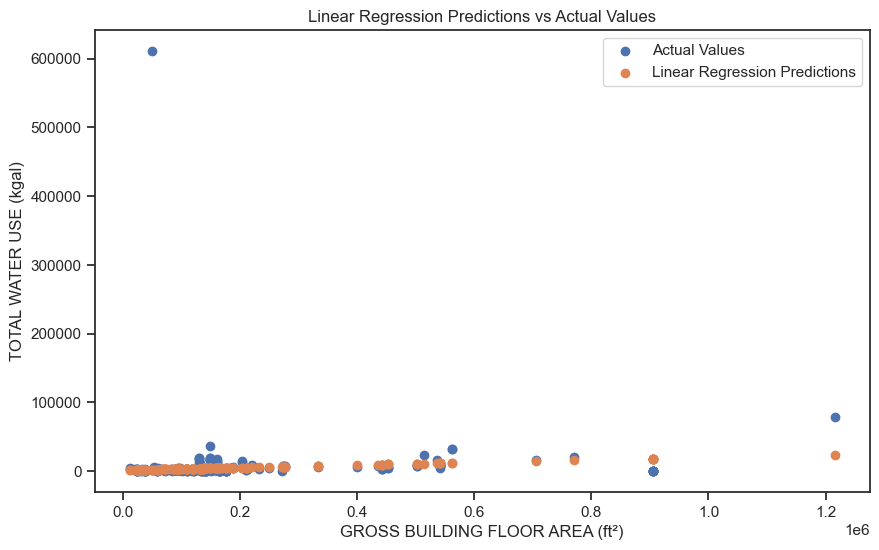

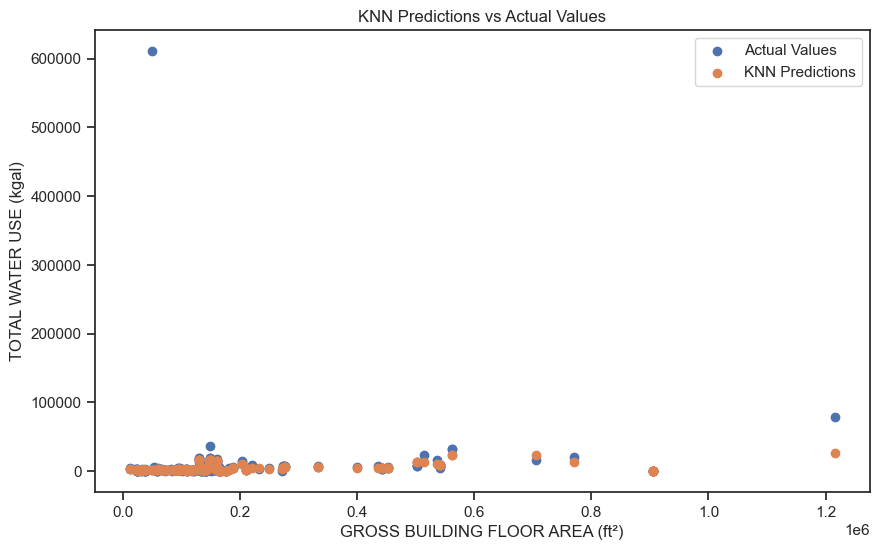

In [76]:
import matplotlib.pyplot as plt

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(cleaned_df['GROSS BUILDING FLOOR AREA (ft²)'], cleaned_df['TOTAL WATER USE (kgal)'], label='Actual Values')
# Scatter plot for Linear Regression predictions
plt.scatter(cleaned_df['GROSS BUILDING FLOOR AREA (ft²)'], cleaned_df['Linear_Reg_Predictions'], label='Linear Regression Predictions', marker='o')

# Set the label for x-axis
plt.xlabel('GROSS BUILDING FLOOR AREA (ft²)')
# Set the label for y-axis
plt.ylabel('TOTAL WATER USE (kgal)')
# Set the title for the plot
plt.title('Linear Regression Predictions vs Actual Values')
# Display legend for better interpretation
plt.legend()
# Show the plot
plt.show()


# Plotting predictions for k-Nearest Neighbors model
# Set the figure size for the plot
plt.figure(figsize=(10, 6))
# Scatter plot for actual values
plt.scatter(cleaned_df['GROSS BUILDING FLOOR AREA (ft²)'], cleaned_df['TOTAL WATER USE (kgal)'], label='Actual Values')
# Scatter plot for k-Nearest Neighbors predictions
plt.scatter(cleaned_df['GROSS BUILDING FLOOR AREA (ft²)'], cleaned_df['KNN_Reg_Predictions'], label='KNN Predictions', marker='o')

# Set the label for x-axis
plt.xlabel('GROSS BUILDING FLOOR AREA (ft²)')
# Set the label for y-axis
plt.ylabel('TOTAL WATER USE (kgal)')
# Set the title for the plot
plt.title('KNN Predictions vs Actual Values')
# Display legend for better interpretation
plt.legend()
# Show the plot
plt.show()



filter the DataFrame cleaned_df to include only rows where 'TOTAL WATER USE (kgal)' is less than 50000, and then, plots the predictions for both the Linear Regression and k-Nearest Neighbors models. The filtering is performed to focus on cases where 'TOTAL WATER USE (kgal)' is less than 50000.

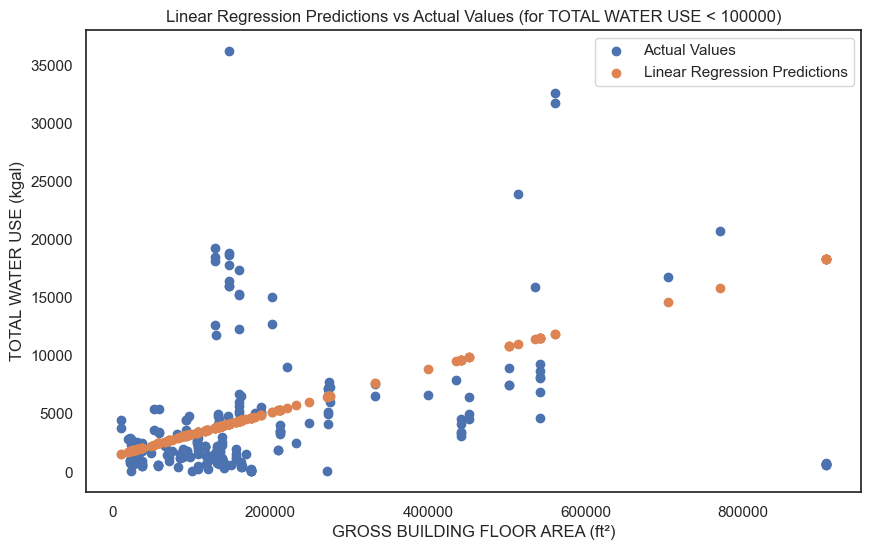

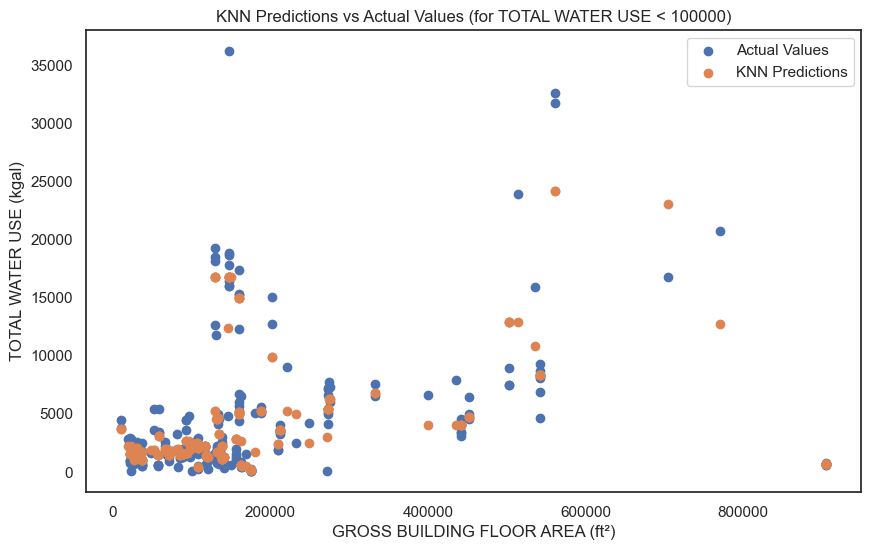

In [12]:
import matplotlib.pyplot as plt

# Filter data for 'TOTAL WATER USE (kgal)' less than 100000
filtered_df = cleaned_df[cleaned_df['TOTAL WATER USE (kgal)'] < 50000]

# Plotting predictions for Linear Regression model
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['GROSS BUILDING FLOOR AREA (ft²)'], filtered_df['TOTAL WATER USE (kgal)'], label='Actual Values')
plt.scatter(filtered_df['GROSS BUILDING FLOOR AREA (ft²)'], filtered_df['Linear_Reg_Predictions'], label='Linear Regression Predictions', marker='o')
plt.xlabel('GROSS BUILDING FLOOR AREA (ft²)')
plt.ylabel('TOTAL WATER USE (kgal)')
plt.title('Linear Regression Predictions vs Actual Values (for TOTAL WATER USE < 100000)')
plt.legend()
plt.show()

# Plotting predictions for k-Nearest Neighbors model
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['GROSS BUILDING FLOOR AREA (ft²)'], filtered_df['TOTAL WATER USE (kgal)'], label='Actual Values')
plt.scatter(filtered_df['GROSS BUILDING FLOOR AREA (ft²)'], filtered_df['KNN_Reg_Predictions'], label='KNN Predictions', marker='o')
plt.xlabel('GROSS BUILDING FLOOR AREA (ft²)')
plt.ylabel('TOTAL WATER USE (kgal)')
plt.title('KNN Predictions vs Actual Values (for TOTAL WATER USE < 100000)')
plt.legend()
plt.show()


### Calculating the accuracy of both models ###

calculate the Root Mean Squared Error (RMSE) for both the Linear Regression and k-Nearest Neighbors models using the test data. RMSE is a measure of the average magnitude of the errors between predicted and actual values. Lower RMSE values indicate better model performance.

In [77]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for Linear Regression model
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_model.predict(X_test)))
print(f'RMSE for Linear Regression model: {linear_rmse}')

# Calculate RMSE for k-Nearest Neighbors model
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_model.predict(X_test)))
print(f'RMSE for k-Nearest Neighbors model: {knn_rmse}')


RMSE for Linear Regression model: 87934.01828701425
RMSE for k-Nearest Neighbors model: 87911.2115427895


* Linear Regression Model:

RMSE: 87934.0183

* k-Nearest Neighbors Model:

RMSE: 87911.2115

Both models have similar RMSE values, and the lower the RMSE, the better the model's predictive performance. However, the interpretation of the RMSE depends on the scale of the target variable ('TOTAL WATER USE (kgal)'). In this case, the RMSE values indicate the average magnitude of errors in predicting the 'TOTAL WATER USE (kgal)' in the units of 'TOTAL WATER USE (kgal)'.

It's essential to compare these RMSE values to the range and distribution of the target variable to understand the relative performance of the models. Additionally, consider other evaluation metrics and explore the residuals (differences between predicted and actual values) to gain insights into the models' strengths and weaknesses.

-----------------------------------------------

demonstrate how to perform hyperparameter tuning using GridSearchCV for a k-Nearest Neighbors (k-NN) regression model. The goal is to find the best value for the hyperparameter n_neighbors that minimizes the mean squared error on the training set.

In [78]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Suppressing FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

cleaned_df = pd.read_csv('cleaned_buildings_energy.csv')

features = cleaned_df[['GROSS BUILDING FLOOR AREA (ft²)']]
target = cleaned_df['TOTAL WATER USE (kgal)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Convert to dense format to avoid sparse warnings
X_train_dense = X_train.to_numpy()
X_test_dense = X_test.to_numpy()

# Define the parameter grid for k-NN
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Initialize the k-NN model
knn_model = KNeighborsRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform the grid search on the training data
grid_search.fit(X_train_dense, y_train)

# Get the best parameter from the grid search
best_k = grid_search.best_params_['n_neighbors']

# Initialize the k-NN model with the best parameter
best_knn_model = KNeighborsRegressor(n_neighbors=best_k)

# Train the model with the best parameter on the entire training set
best_knn_model.fit(X_train_dense, y_train)

# Predictions using the best k-NN model
best_knn_predictions = best_knn_model.predict(X_test_dense)

# Calculate RMSE for the best k-NN model
best_knn_rmse = np.sqrt(mean_squared_error(y_test, best_knn_predictions))
print(f'RMSE for k-NN model with best k={best_k}: {best_knn_rmse}')


RMSE for k-NN model with best k=1: 87946.74844017354


The RMSE result for the k-NN model with the best value of k (k=1) is approximately 87946.75. This value represents the Root Mean Squared Error, which measures the average magnitude of errors between the predicted and actual values for the 'TOTAL WATER USE (kgal)' variable on the test set

## Predictive model: Random Forest


demonstrate how to use a Random Forest Regressor to make predictions on the 'OUTDOOR WATER USE (kgal)' variable based on the features 'YEAR BUILT' and 'TOTAL WATER USE (kgal)'. It also visualizes the predicted values against the actual values and calculates the Root Mean Squared Error (RMSE) to evaluate the model's performance.

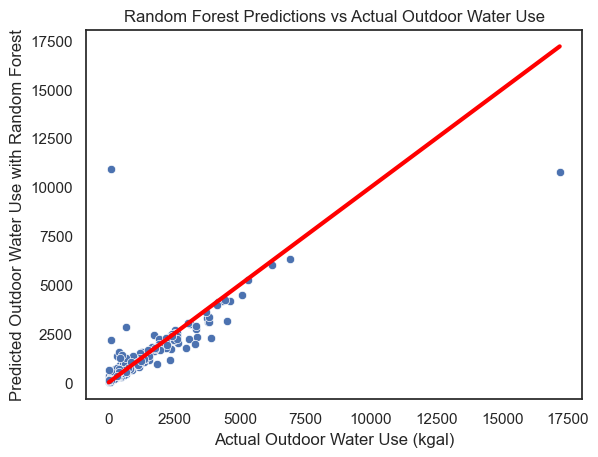

RMSE for Random Forest is 904.0910054327445


In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv('cleaned_buildings_energy.csv')

# Make a copy to avoid SettingWithCopyWarning
new_df = df.copy()

# Replace '0' and 'Not Available' with NaN
new_df.replace(['0', 'Not Available'], pd.NA, inplace=True)

# Drop rows with NaN values
new_df.dropna(inplace=True)

# Assuming 'YEAR BUILT', 'TOTAL WATER USE (kgal)', and 'PROPERTY TYPE' are features, and 'OUTDOOR WATER USE (kgal)' is target variable
features = new_df[['YEAR BUILT', 'TOTAL WATER USE (kgal)']]
target = new_df['OUTDOOR WATER USE (kgal)']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)

# Predictions
new_df['OUTDOOR_WATER_USE_PREDICTED'] = random_forest.predict(features)

# Plotting predictions
sns.scatterplot(x='OUTDOOR WATER USE (kgal)', y='OUTDOOR_WATER_USE_PREDICTED', data=new_df)
plt.plot([min(new_df['OUTDOOR WATER USE (kgal)']), max(new_df['OUTDOOR WATER USE (kgal)'])], [min(new_df['OUTDOOR WATER USE (kgal)']), max(new_df['OUTDOOR WATER USE (kgal)'])], color='red', lw=3)
plt.xlabel('Actual Outdoor Water Use (kgal)')
plt.ylabel('Predicted Outdoor Water Use with Random Forest')
plt.title('Random Forest Predictions vs Actual Outdoor Water Use')
plt.show()

# Calculating RMSE
rmse = mean_squared_error(new_df['OUTDOOR WATER USE (kgal)'], new_df['OUTDOOR_WATER_USE_PREDICTED'], squared=False)
print("RMSE for Random Forest is", rmse)


use scikit-learn to train a Random Forest Regressor on the features 'YEAR BUILT' and 'TOTAL WATER USE (kgal)' to predict the target variable 'OUTDOOR WATER USE (kgal)'. It then evaluates the model's performance by calculating and printing the Root Mean Squared Error (RMSE) on the test set.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math

x = df[['YEAR BUILT', 'TOTAL WATER USE (kgal)']] 
y = df['OUTDOOR WATER USE (kgal)']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)

# Make predictions on the test set
predictions = random_forest.predict(x_test)

# Calculate and print the RMSE for the Random Forest model
rmse = math.sqrt(mean_squared_error(y_test, predictions))
print("RMSE for Random Forest is", rmse)


RMSE for Random Forest is 1767.6995423025196


The RMSE of 1767.70 indicates the average magnitude of the errors between the actual and predicted values of the 'OUTDOOR WATER USE (kgal)' variable

---------------------

use scikit-learn to train a Random Forest Regressor on the features 'YEAR BUILT' and 'TOTAL WATER USE (kgal)' to predict the target variable 'OUTDOOR WATER USE (kgal)'. After training the model, it makes predictions on the test set and creates a DataFrame (results_df) that contains the actual and predicted values of the target variable for better readability.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math

x = df[['YEAR BUILT', 'TOTAL WATER USE (kgal)']] 
y = df['OUTDOOR WATER USE (kgal)']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)

# Make predictions on the test set
predictions = random_forest.predict(x_test)

# Combine actual views and predicted views into a DataFrame for better readability
results_df = pd.DataFrame({'Actual Views': y_test, 'Predicted Views': predictions})

# Print the DataFrame with actual and predicted views
print(results_df)


     Actual Views  Predicted Views
24          674.6          454.847
6          1186.4         1526.968
93         1927.7         2419.220
109         471.9          626.905
104           0.0          299.269
172        1778.1         1687.399
233         303.0          356.383
86         1339.0         1102.688
9           387.9          569.581
143        2535.9         2677.771
45         1145.0          782.999
206        1830.3          979.851
114         563.5          400.240
168         602.8          530.605
113          77.6         2377.832
230         372.5          609.509
185        3826.8         3519.064
15          287.6          565.097
152         172.8          299.731
125        2195.1         2326.725
127         573.5          510.038
19          485.2         1041.956
235        2333.1         1271.165
30         3111.8         2919.110
176          43.6           24.510
150        3069.2         2176.741
10          563.3          413.852
201        2932.0   

use this information to assess how well the model is performing. Comparing the actual and predicted values allows us to evaluate the accuracy of the model predictions. If the predicted values closely match the actual values, the model is considered to be performing well.


# References

* Fritsch, M., Haupt, H., Lösel, F., & Stemmler, M. (2019). Regression trees and random forests as alternatives to classical regression modeling: Investigating the risk factors for corporal punishment. Psychological Test and Assessment Modeling, 61(4), 389-417. DOI:10.1080/17444731.2019.1658326

* From Black Box to Shining Spotlight: Using Random Forest Prediction Intervals to Illuminate the Impact of Assumptions in Linear Regression: The American Statistician: Vol 76, No 4 - Taylor & Francis Online

* Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32. DOI: 10.1023/A:1010933404324

* Hastie, T., Tibshirani, R., & Friedman, J. H. (2009). The elements of statistical learning (2nd ed.). New York: Springer.